# 📈 Análise e Predição - Dataset Adult

### Bernardo Rocha Coutinho - 11288235 - PMR3508-2020-151

Bem vindo a este notebook de análise de dados e predição do dataset **Adult**! 

Aqui, vou tentar explicar as partes do trabalho que fiz com o dataset, além de expor algumas técnicas de Ciência de Dados e Aprendizado de Máquina no caminho.

### Índice
- [🎲 Importando os Dados](#section-one)
- [📈 Visualização de Dados](#section-two)
  - [🔢 Visualizando Variáveis Numéricas](#subsection-two-one)
  - [📊 Visualizando Variáveis Categóricas](#subsection-two-two)
- [🧹 Limpeza de Dados](#section-three)
  - [⚗️ Pré-Processamento](#subsection-three-one)
- [🔮 Predição](#section-four)

Antes de qualquer coisa, vamos importar duas bibliotecas bem importantes para trabalhar com os nossos dados: *numpy* e *pandas*. Caso você não esteja muito familiarizado com essas bibliotecas, recomendo a leitura do seguinte texto:

[Leitura Recomendada - Bibliotecas de Data Science](https://medium.com/turing-talks/turing-talks-6-data-science-libraries-6c2599838b3e)

In [1]:
import numpy as np
import pandas as pd

Em seguida, vamos reverter nosso **scikit-learn** para a versão 0.23.0 e realizar um pequeno bugfix. Esse passo só é necessário porque a versão atual do sklearn conflita com uma biblioteca que utilizaremos durante a predição, a **scikit-optimize**.

In [2]:
!pip install scikit-learn==0.23.0

from numpy.ma import MaskedArray
import sklearn.utils.fixes

sklearn.utils.fixes.MaskedArray = MaskedArray

     |████████████████████████████████| 7.3 MB 9.3 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

kmeans-smote 0.1.2 requires imbalanced-learn<0.5,>=0.4.0, but you'll have imbalanced-learn 0.7.0 which is incompatible.
kmeans-smote 0.1.2 requires numpy<1.16,>=1.13, but you'll have numpy 1.18.5 which is incompatible.
kmeans-smote 0.1.2 requires scikit-learn<0.21,>=0.19.0, but you'll have scikit-learn 0.23.0 which is incompatible.
hypertools 0.6.2 requires scikit-learn<0.22,>=0.19.1, but you'll have scikit-learn 0.23.0 which is incompatible.


<a id="section-one"></a>
## 🎲 Importando os Dados

Antes de começar a fazer qualquer análise, precisamos antes importar os nossos dados. Para isto, utilizamos o método `read_csv` da biblioteca **pandas** com o local do nosso arquivo. Também especificaremos que a coluna 'Id' são os índices da nossa tabela, e que os elementos com '?' serão considerados valores faltantes.

In [3]:
df = pd.read_csv("../input/adult-pmr3508/train_data.csv", index_col=['Id'], na_values="?")

Em seguida, podemos dar uma primeira olhada nos nossos dados com o método `head` do nosso dataframe.

In [4]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
Id,,,,,,,,,,,,,,,
16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,>50K


Com o método `info`, podemos observar o tipo de cada variável da nossa tabela, bem como quantos valores não faltantes nós temos.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32560 entries, 16280 to 48839
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       30724 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education.num   32560 non-null  int64 
 5   marital.status  32560 non-null  object
 6   occupation      30717 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital.gain    32560 non-null  int64 
 11  capital.loss    32560 non-null  int64 
 12  hours.per.week  32560 non-null  int64 
 13  native.country  31977 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


Como você consegue ver, temos **14** variáveis diferentes: treze independentes e uma de classe. Essa variável de classe é o que queremos prever, a renda anual de cada pessoa (ou 'income').

Essas 14 variáveis estão divididas entre variáveis ***numéricas*** e variáveis ***categóricas***. As ***numéricas***, como a quantidade de horas trabalhadas por semana (ou 'hours.per.week'), são representadas por números, o que faz com que elas sejam facilmente compreendidas pelo nosso computador. Já as ***categóricas***, como o sexo de cada indivíduo (ou 'sex'), estão divididas em categorias ('Male' e 'Female') e portanto são um pouco mais complicadas de se trabalhar inicialmente. Na limpeza de dados, nós deveremos de alguma maneira transformar elas em números para que o nosso estimador consiga fazer cálculos.

Por fim, podemos utilizar o método `describe` para obter algumas estatísticas mais simples sobre os nossos dados:

In [6]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Dando uma olhada inicial nos nossos dados numéricos, já podemos perceber algumas coisas interessantes. As variáveis **'capital-gain'** e **'capital.loss'** parecem ser bem esparsas, com a maioria de seus dados sendo iguais a 0. Além disso, o **'capital.gain'** especialmente parece ter alguns outliers, em função de seu grande desvio padrão e de seu máximo de **99999.0**.

<a id="section-two"></a>
## 📈 Visualização de Dados

Após a importação, podemos começar o processo de **Visualização de Dados**, no qual tentaremos entender melhor a disposição de nossos dados e definir como vamos trabalhar com eles. 

**[Leitura Recomendada - Visualização e Análise de Dados](https://medium.com/turing-talks/como-visualizar-e-analisar-dados-com-python-f209bfbae68e)**

Nosso primeiro passo será importar as bibliotecas *matplotlib* e *seaborn*, muito úteis para a construção de gráficos.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

Em seguida, optei por copiar nosso dataframe para um *df_analysis*, já que será preciso fazer uma pequena mudança para melhor visualizar os dados.

In [8]:
# Copia "df" para "df_analysis"
df_analysis = df.copy()

Vamos utilizar a classe **LabelEncoder** do **scikit-learn** para transformar nossa variável de classe **income** em numérica, mapeando todos os valores "<=50K" e ">50K" em 0s e 1s.

In [9]:
# Importando o LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instanciando o LabelEncoder
le = LabelEncoder()

# Modificando o nosso dataframe, transformando a variável de classe em 0s e 1s
df_analysis['income'] = le.fit_transform(df_analysis['income'])

Agora a nossa coluna **income** contém somente valores numéricos, com os quais poderemos trabalhar muito mais facilmente.

In [10]:
df_analysis['income']

Id
16280    0
16281    0
16282    0
16283    0
16284    1
        ..
48835    1
48836    0
48837    0
48838    0
48839    0
Name: income, Length: 32560, dtype: int64

<a id="subsection-two-one"></a>
### 🔢 Visualizando Variáveis Numéricas

Como primeiro gráfico, vamos construir um **heatmap** representando a correlação entre as variáveis numéricas do nosso DataFrame:

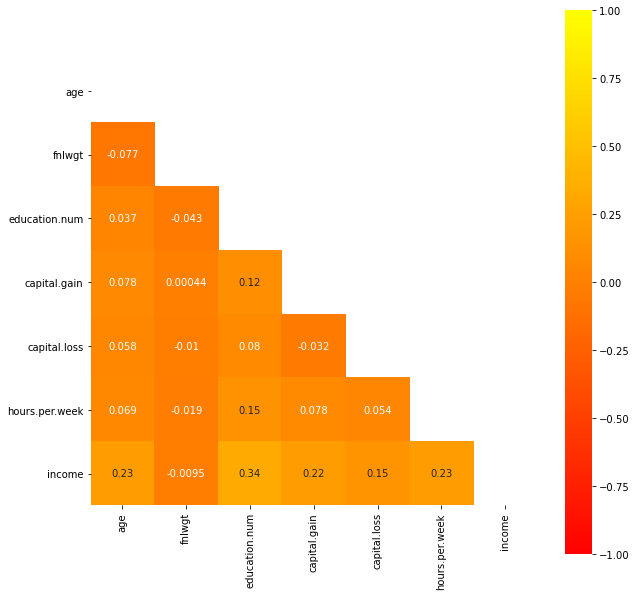

In [11]:
mask = np.triu(np.ones_like(df_analysis.corr(), dtype=np.bool))

plt.figure(figsize=(10,10))

sns.heatmap(df_analysis.corr(), mask=mask, square = True, annot=True, vmin=-1, vmax=1, cmap='autumn')
plt.show()

Cada quadrado do heatmap representa o coeficiente de correlação entre as variáveis correspondentes nos eixos X e Y, e quanto mais próxima de amarelo for sua cor, maior a correlação positiva. Por exemplo, a correlação entre o **"education.num"** e a **"income"** é de **0.34**, por isto sua cor é mais clara que as outras.

No gráfico, podemos observar que todas as nossas variáveis possuem algum grau de correlação com a **"income"**, o valor que queremos predizer, exceto pela **"fnlwgt"**, que não parece estar relacionada com nenhuma outra variável. Em função disto, parece não existir muito valor em utilizar essa variável como feature, já que ela não ajudará a diferenciar os nossos dados.

Para analisar a distribuição de cada variável, podemos utilizar o método `distplot`:

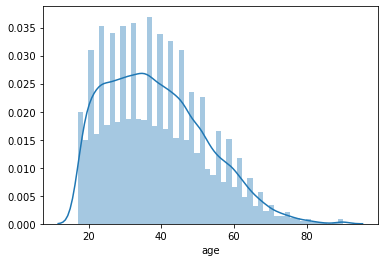

In [12]:
sns.distplot(df_analysis['age']);

Entretanto, vamos focar em analisar a distribuição de cada variável em relação à variável de classe **'income'**, o que pode ser feito por meio do método `catplot`.

Com o catplot, podemos traçar um scatter plot simples das nossas variáveis:

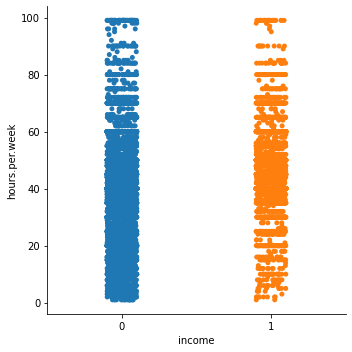

In [13]:
sns.catplot(x="income", y="hours.per.week", data=df_analysis);

Como é possível perceber, esse tipo de visualização acaba não sendo tão útil quando temos muitos dados. Apesar disso, podemos ver que indivíduos que trabalham poucas horas por semana tendem a ganhar menos de 50k por ano.

Para visualizar melhor nossas distribuições, vamos utilizar os 'boxen plots', como apresentado a seguir:

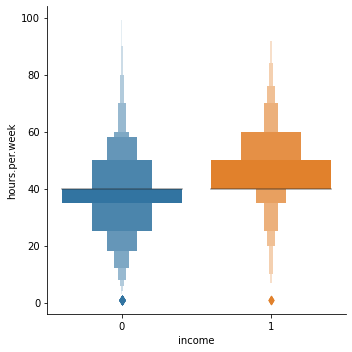

In [14]:
sns.catplot(x="income", y="hours.per.week", kind="boxen", data=df_analysis);

Agora conseguimos perceber melhor a distribuição das horas semanais bem como sua relação com a renda de cada pessoa. Vamos também traçar esse gráfico para nossas outras variáveis:

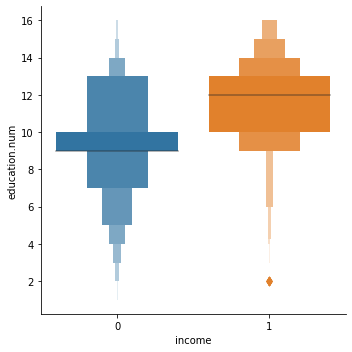

In [15]:
sns.catplot(x="income", y="education.num", kind="boxen", data=df_analysis);

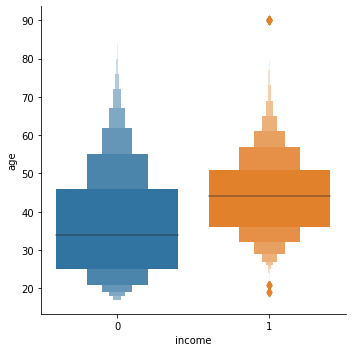

In [16]:
sns.catplot(x="income", y="age", kind="boxen", data=df_analysis);

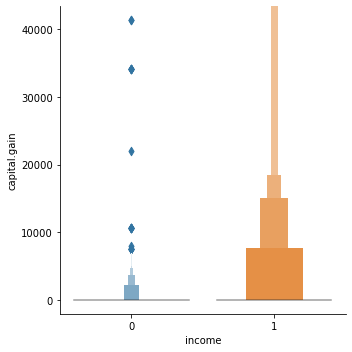

In [17]:
sns.catplot(x="income", y="capital.gain", kind="boxen", data=df_analysis);

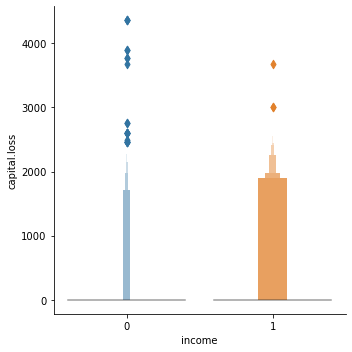

In [18]:
sns.catplot(x="income", y="capital.loss", kind="boxen", data=df_analysis);

Esses dois últimos gráficos, de **'capital.gain'** e **'capital.loss'**, certamente parecem diferir bastante dos anteriores. Quando traçamos novamente os scatter plots, o motivo fica bem mais claro:

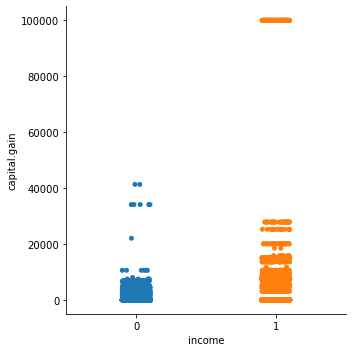

In [19]:
sns.catplot(x="income", y="capital.gain", data=df_analysis);

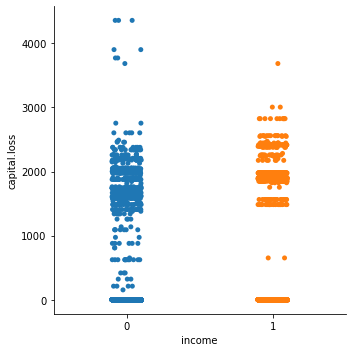

In [20]:
sns.catplot(x="income", y="capital.loss", data=df_analysis);

Quando usamos o método `describe` do DataFrame no início do notebook, percebemos que essas duas variáveis pareciam bem esparsas e com alguns outliers. Com esses gráficos, essa distribuição fica ainda mais clara. É importante manter esse fato em mente, depois vamos utilizá-lo para fazer o pré-processamento dos nossos dados.

In [21]:
df_analysis.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469,0.240817
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618,0.427586
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


<a id="subsection-two-two"></a>
### 📊 Visualizando Variáveis Categóricas

Para visualizar as variáveis categóricas, precisaremos de outros tipos de gráficos para representar claramente nossas diferentes categorias. Nesse caso, vamos recorrer aos gráficos de barras para comparar a renda de vários grupos.

O método `catplot` da biblioteca *seaborn* é uma ótima opção para traçar os gráficos com variáveis categóricas, e só precisamos especificar o parâmetro `kind` para obter vários tipos de gráficos diferentes.

Primeiramente, vamos representar o gráfico do **sexo** de cada pessoa pela probabilidade de cada uma ganhar mais de 50k por ano:

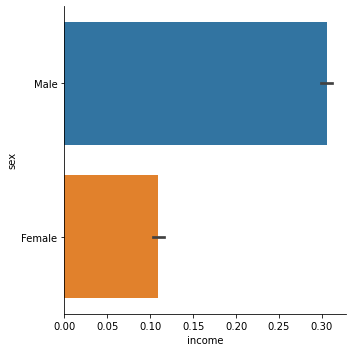

In [22]:
sns.catplot(y="sex", x="income", kind="bar", data=df_analysis);

**É uma diferença bem grande!** 

Enquanto **30%** dos homens ganham mais que 50k por ano, somente **10%** das mulheres ultrapassam esse total.

Em seguida, podemos traçar o mesmo gráfico para as diferentes etnias do nosso dataset:

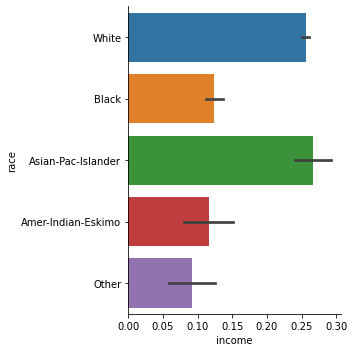

In [23]:
sns.catplot(y="race", x="income", kind="bar", data=df_analysis);

A desigualdade também está presente nesse caso. A etnia de cada indivíduo parece ter uma relação bem grande com sua probabilidade de ganhar mais de 50k.

Vamos fazer o mesmo para as outras três variáveis categóricas do nosso dataset:

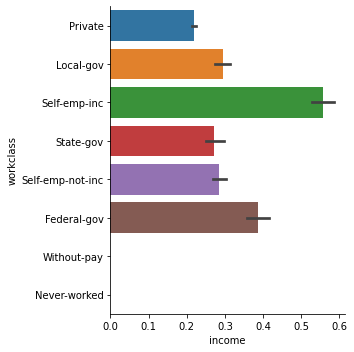

In [24]:
sns.catplot(y="workclass", x="income", kind="bar", data=df_analysis);

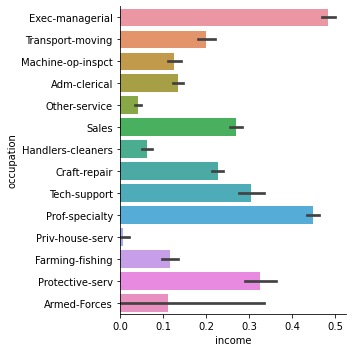

In [25]:
sns.catplot(y="occupation", x="income", kind="bar", data=df_analysis);

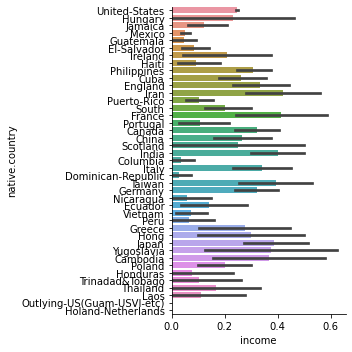

In [26]:
sns.catplot(y="native.country", x="income", kind="bar", data=df_analysis);

Olhando por cima, todas as nossas variáveis parecem estar ligadas de alguma forma com a renda dos indivíduos.

Principalmente nesse último gráfico, você deve ter percebido as linhas pretas em cima de cada uma das barras. Essas linhas representam a variação de renda dentro de cada grupo. A maioria dos países possui uma variação muito grande, tão grande que não podemos ter muita certeza de seu valor real.

Quando analisamos a quantidade de indivíduos de cada nação no nosso dataset, essa variação começa a fazer mais sentido:

In [27]:
df_analysis["native.country"].value_counts()

United-States                 29169
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

Temos um caso bem extremo de dados desbalanceados, a **grande maioria** dos nossos indivíduos é dos Estados Unidos, 90% da quantidade total. Para efeito de comparação, o México representa somente 2% do nosso dataset.

Apesar de existirem maneiras de lidar com esse tipo de problema, para simplificar optei por remover essa coluna.

<a id="section-three"></a>
## 🧹 Limpeza de Dados

Agora que temos uma boa noção dos nossos dados, podemos começar a preparação e a limpeza deles para facilitar o trabalho do nosso modelo. Caso queria ler um pouco mais sobre esse processo, você pode dar uma lida nesse texto:

[Leitura Recomendada](https://medium.com/turing-talks/como-fazer-uma-limpeza-de-dados-completa-em-python-7abc9dfc19b8)

A primeira limpeza que faremos é remover os dados duplicados. Para isto, podemos utilizar o método `drop_duplicates` do nosso dataframe:

In [28]:
df.drop_duplicates(keep='first', inplace=True)

Em seguida, vamos remover algumas colunas que não consideramos tão importantes:

In [29]:
df = df.drop(['fnlwgt', 'native.country', 'education'], axis=1)

Agora, podemos ver como ficou o nosso dataframe:

In [30]:
df.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
Id,,,,,,,,,,,,
16280,34,Private,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,<=50K
16281,58,Local-gov,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,<=50K
16282,25,Private,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,<=50K
16283,24,Private,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,<=50K
16284,57,Self-emp-inc,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,>50K


Podemos agora separar os nossos dados em X e Y, sendo X as nossas variáveis independentes e Y a nossa variável de classe:

In [31]:
# Removendo a nossa variável de classe
Y_train = df.pop('income')

X_train = df

Assim fica o nosso novo dataframe sem a variável de classe:

In [32]:
X_train.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week
Id,,,,,,,,,,,
16280,34,Private,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44
16281,58,Local-gov,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40
16282,25,Private,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42
16283,24,Private,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40
16284,57,Self-emp-inc,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60


<a id="subsection-three-one"></a>
### ⚗️ Pré-Processamento

Para processar nossos dados, vamos dividí-los em três partes diferentes: os dados **categóricos**, os dados **esparsos** e os dados **numéricos**. Dessa forma, poderemos trabalhar com eles de maneira diferente.

In [33]:
# Seleciona as variáveis numéricas
numerical_cols = list(X_train.select_dtypes(include=[np.number]).columns.values)

# Remove as variáveis numéricas esparsas
numerical_cols.remove('capital.gain')
numerical_cols.remove('capital.loss')

# Seleciona as variáveis numéricas esparsas
sparse_cols = ['capital.gain', 'capital.loss']

# Seleciona as variáveis categóricas
categorical_cols = list(X_train.select_dtypes(exclude=[np.number]).columns.values)

# Mostrando as diferentes seleções
print("Colunas numéricas: ", numerical_cols)
print("Colunas esparsas: ", sparse_cols)
print("Colunas categóricas: ", categorical_cols)

Colunas numéricas:  ['age', 'education.num', 'hours.per.week']
Colunas esparsas:  ['capital.gain', 'capital.loss']
Colunas categóricas:  ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex']


#### Dados Categóricos

O primeiro passo que tomaremos é completar os dados faltantes do nosso dataset, para o qual usaremos a classe `SimpleImputer` do **scikit-learn**.

O `SimpleImputer` é um **transformador** que preenche os dados faltantes de cada variável de acordo com uma estratégia que podemos escolher:

 - `mean` - Preenche os dados faltantes com a média da coluna
 - `median` - Preenche os dados faltantes com a mediana da coluna
 - `most_frequent` - Preenche os dados faltantes com a moda da coluna
 
Para os nossos dados categóricos, escolheremos a estratégia `most_frequent`!

A seguir, temos uma explicação do funcionamento desse Imputer:

In [34]:
from sklearn.impute import SimpleImputer

# Inicializa nosso Imputer
simple_imputer = SimpleImputer(strategy='most_frequent')

In [35]:
# Cria um array com um dado faltante
array = np.array([["Female"],
         ["Male"],
         [np.nan],
         ["Female"]], dtype=object)

# Preenche o dado faltante com o Imputer
new_array = simple_imputer.fit_transform(array)

print(new_array)

[['Female']
 ['Male']
 ['Female']
 ['Female']]


Nosso array foi completado com o dado **'Female'**, a moda da nossa variável!

Em seguida, precisaremos transformar os dados categóricos em numéricos para que o nosso modelo consiga interpretá-lo. Para isto, vamos utilizar o `OneHotEncoder`.

Esse encoder transforma a nossa variável com N classes em N variáveis binárias, indicando se o nosso dado pertence àquela classe. Com o seguinte exemplo essa ideia fica mais clara:

In [36]:
from sklearn.preprocessing import OneHotEncoder

# Inicializa nosso Encoder
one_hot = OneHotEncoder(sparse=False)

In [37]:
# Cria um array com dados categóricos
array = np.array([["Female"],
         ["Male"],
         ["Female"],
         ["Female"]], dtype=object)

# Transforma o nosso array
new_array = one_hot.fit_transform(array)

new_array

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

Ao final da transformação, possuímos duas colunas numéricas diferentes! A primeira indica se o nosso indivíduo é do sexo feminino enquanto a segunda indica se ele é do sexo masculino. Note que apenas uma dessas colunas pode ser igual a **1** para cada linha do nosso array.

Agora que entendemos os nossos transformadores categóricos, podemos construir a nossa **Pipeline** categórica. 

Uma Pipeline nada mais é que uma sequência de transformadores do scikit-learn. Dessa forma, na célula a seguir estaremos criando uma Pipeline com os dois passos detalhados acima:

 - Um SimpleImputer
 - Um OneHotEncoder

In [38]:
from sklearn.pipeline import Pipeline

# Cria a nossa pipeline categórica
categorical_pipeline = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehot', OneHotEncoder(drop='if_binary'))
])

Agora, podemos usar essa Pipeline para aplicar os dois passos anteriores com apenas um `fit_transform`:

In [39]:
# Cria um array com dados categóricos
array = np.array([["Female"],
         ["Male"],
         [np.nan],
         ["Female"]], dtype=object)

# Transforma o nosso array
new_array = categorical_pipeline.fit_transform(array)

#### Dados Numéricos

Para os nossos dados numéricos, também começaremos com o preenchimento de dados faltantes. No entanto, nesse caso vamos utilizar um outro tipo de imputer, o `KNNImputer`.

Esse Imputer preenche os dados faltantes aplicando o próprio k-Nearest Neighbors, utilizando a coluna com os dados faltantes como variável de classe.

In [40]:
from sklearn.impute import KNNImputer

# Cria o nosso KNNImputer com 5 vizinhos
knn_imputer = KNNImputer(n_neighbors=5)

In [41]:
# Cria o nosso array com dados faltantes
array = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]

# Preenche os dados faltantes
new_array = knn_imputer.fit_transform(array)

new_array

array([[1., 2., 5.],
       [3., 4., 3.],
       [4., 6., 5.],
       [8., 8., 7.]])

Em seguida, vamos utilizar o `StandardScaler` para normalizar nossas variáveis. 

Esse transformador padroniza as nossas features alterando sua média para 0 e seu desvio padrão para 1. Dessa forma, todas as variáveis estarão em uma mesma **'escala'**.

In [42]:
from sklearn.preprocessing import StandardScaler

# Cria o nosso StandardScaler
scaler = StandardScaler()

In [43]:
# Cria um array numérico
array = [[-3, 0], [0, 0], [3, 1], [0, 1]]

# Normaliza nosso array
new_array = scaler.fit_transform(array)

new_array

array([[-1.41421356, -1.        ],
       [ 0.        , -1.        ],
       [ 1.41421356,  1.        ],
       [ 0.        ,  1.        ]])

Por fim, agora podemos criar a nossa **Pipeline** numérica:

In [44]:
# Cria a nossa pipeline numérica
numerical_pipeline = Pipeline(steps = [
    ('imputer', KNNImputer(n_neighbors=5, weights="uniform")),
    ('scaler', StandardScaler())
])

#### Dados Numéricos Esparsos

Por fim, temos as colunas 'capital.gain' e 'capital.loss', que se diferem muito dos outros dados numéricos por serem bem mais esparsas e possuírem mais outliers.

Para préprocessá-las, vamos adotar os mesmos passos da Pipeline numérica, apenas trocando o `StandardScaler` por um `RobustScaler`:

In [45]:
from sklearn.preprocessing import RobustScaler

sparse_pipeline = Pipeline(steps = [
    ('imputer', KNNImputer(n_neighbors=5, weights="uniform")),
    ('scaler', RobustScaler())
])

#### Juntando tudo

Com todas as nossas Pipelines definidas, podemos juntá-las em apenas um transformador, que utilizaremos para préprocessar o dataset. Para tal, usaremos o `ColumnTransformer`, que aplicará as diferentes pipelines em suas respectivas colunas:

In [46]:
from sklearn.compose import ColumnTransformer

# Cria o nosso Pré-Processador

# Cada pipeline está associada a suas respectivas colunas no datast
preprocessor = ColumnTransformer(transformers = [
    ('num', numerical_pipeline, numerical_cols),
    ('spr', sparse_pipeline, sparse_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

Finalmente, podemos aplicar todos esses passos no nosso dataset com apenas uma linha de código:

In [47]:
X_train = preprocessor.fit_transform(X_train)

<a id="section-four"></a>
## 🔮 Predição

Terminada a limpeza e o pré-processamento dos dados, podemos enfim aplicar o nosso modelo de predição, nesse caso, um **classificador KNN**. Caso você não esteja familiarizado com esse modelo, recomendo a leitura do seguinte texto:

**[Leitura Recomendada - KNN](https://medium.com/turing-talks/turing-talks-13-modelo-de-predi%C3%A7%C3%A3o-knn-3be880c9b9d1)**

Para utilizar esse modelo, vamos instanciar a classe `KNeighborsClassifier` do **scikit-learn**:

In [48]:
from sklearn.neighbors import KNeighborsClassifier

# Instancia nosso classificador
knn = KNeighborsClassifier(n_neighbors=20)

### Cross-Validation

Para estimar a acurácia do nosso modelo, vamos utilizar o método chamado **"Cross-Validation"**, ou **"Validação Cruzada"**. 

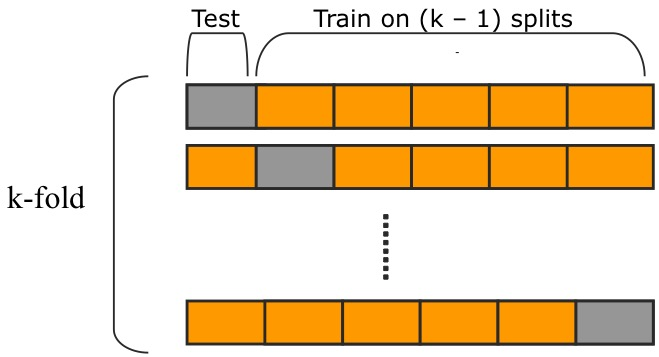

Nele, particionamos os nossos dados em k divisões e treinamos o nosso modelo em k-1 delas, sempre deixando uma última livre para testar o desempenho. Como repetimos esse processo k vezes, ao final temos uma boa noção da acurácia esperada.

In [49]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(knn, X_train, Y_train, cv = 5, scoring="accuracy")
print("Acurácia com cross validation:", score.mean())

Acurácia com cross validation: 0.86823833233729


Nosso modelo conseguiu um resultado muito bom para 20 vizinhos! Uma acurácia de **86,8%**.

Agora, vamos testar outras quantidades de vizinhos para o nosso KNN, e descobrir qual nos dá um melhor resultado.

In [50]:
# Quantidades de vizinhos a serem testadas
neighbors = [15, 20, 25, 30, 35]

# Dicionário para guardar as pontuações de cada hiperparâmetro
neighbors_scores = {}

for n_neighbors in neighbors:
    # Calcula a média de acurácia de cada classificador
    score = cross_val_score(KNeighborsClassifier(n_neighbors=n_neighbors), X_train, Y_train, cv = 5, scoring="accuracy").mean()
    
    # Guarda essa acurácia
    neighbors_scores[n_neighbors] = score

# Obtém a quantidade de vizinhos com o melhor desempenho
best_n = max(neighbors_scores, key=neighbors_scores.get)

print("Melhor hiperparâmetro: ", best_n)
print("Melhor acurácia: ", neighbors_scores[best_n])

Melhor hiperparâmetro:  20
Melhor acurácia:  0.86823833233729


Parece que a nossa melhor quantidade de vizinhos foi o próprio **20**!

### Bayes Search

Para escolher a melhor quantidade de vizinhos, também podemos utilizar outras técnicas de otimização de hiperparâmetros, como o **Bayes Search**! Se quiser ler mais sobre o assunto, recomendo o seguinte texto:

[Leitura Recomendada - Otimização de Hiperparâmetros](https://medium.com/turing-talks/modelos-de-predi%C3%A7%C3%A3o-otimiza%C3%A7%C3%A3o-de-hiperpar%C3%A2metros-em-python-3436fc55016e)

In [51]:
# Importa o Bayes Search:
from skopt import BayesSearchCV

# Importa o espaço de busca inteiro
from skopt.space import Integer

# Cria o Bayes Search:
bayes_search_cv = BayesSearchCV(estimator = KNeighborsClassifier(),
                              search_spaces = {'n_neighbors': Integer(10, 50),}, # Vizinhos de 10 a 50
                              cv = 3,
                              n_iter = 12, random_state=42)

# Realizando a otimização por BayesSearch:
bayes_search_cv.fit(X_train, Y_train)

best_param = bayes_search_cv.best_params_['n_neighbors']

print('Melhor quantidade de vizinhos: {}'.format(bayes_search_cv.best_params_['n_neighbors']))
print('Desempenho do melhor modelo: {}'.format(round(bayes_search_cv.best_score_,5)))

/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Melhor quantidade de vizinhos: 20
Desempenho do melhor modelo: 0.86652


Surpreendentemente, obtivemos novamente a mesma quantidade de **20** vizinhos!

Agora vamos criar um classificador KNN com 20 vizinhos:

In [52]:
knn = KNeighborsClassifier(n_neighbors=20)

E vamos ajustá-lo para o nosso dataset!

In [53]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=20)

### Dados de Teste

Finalmente, agora podemos predizer os nossos dados teste e enviar uma submissão para o Kaggle.

Primeiramente, vamos importar os nossos dados:

In [54]:
test_data = pd.read_csv("../input/adult-pmr3508/test_data.csv", index_col=['Id'], na_values="?")

Em seguida, vamos remover as colunas que ignoramos anteriormente:

In [55]:
X_test = test_data.drop(['fnlwgt', 'native.country', 'education'], axis=1)

Aplicaremos o preprocessamento:

In [56]:
X_test = preprocessor.transform(X_test)

E prediremos a nossa variável de classe:

In [57]:
predictions = knn.predict(X_test)

Conseguimos obter nosso resultado!

In [58]:
predictions

array(['<=50K', '>50K', '<=50K', ..., '<=50K', '<=50K', '>50K'],
      dtype=object)

## 📄 Submissão

Para submeter nossa predição, vamos exportá-la no formato de `.csv`. Para isso, primeiro vamos criar um DataFrame:

In [59]:
submission = pd.DataFrame()

Depois vamos preenchê-lo com o índice de cada dado e seu respectivo rótulo:

In [60]:
submission[0] = test_data.index
submission[1] = predictions
submission.columns = ['Id','income']

Nosso resultado é esse:

In [61]:
submission.head()

,Id,income
0,0,<=50K
1,1,>50K
2,2,<=50K
3,3,<=50K
4,4,>50K


Finalmente! Só basta exportar nosso DataFrame:

In [62]:
submission.to_csv('submission.csv',index = False)

![](https://i.pinimg.com/originals/4e/9e/6f/4e9e6f979347906a426adcbe57fd3259.gif)

Muito obrigado por acompanhar esse notebook até o final!

Vários conteúdos aplicados na análise não seria possível sem [o material do Grupo Turing](https://medium.com/turing-talks), que recomendo muito.

Se quiser acompanhar nossos projetos, também temos um [GitHub](https://github.com/orgs/GrupoTuring/dashboard) e um [site](http://www.grupoturing.com.br/)!